# Turbulent channel flow data

We will use the turbulent channel flow data from the [Johns Hopkins Turbulence Database(JHTDB)](http://turbulence.pha.jhu.edu/Channel_Flow.aspx) Re=1000 Channel flow. The JHTDB channel flow data is available on a 2048 × 512 × 1536 grid for a domain of
size $ 8 \pi h \times 2h \times 3\pi h $, where h is the half-channel height. The DNS timestep ∆t = 0.0013
non-dimensional units, with the stored simulation timestep, δt = 5∆t, or approximately
one channel flow-through time. The analysis herein is conducted over 100 frames spanning
the entire simulation database with a duration of 4,000 channel flow-through times from
t = 0 to t = 5.9935. All figures and analysis will be displayed in non-dimensional half-channel
height units (h = 1).

More information about the flow-field can be found in [Channel](README_CHANNEL.pdf). Due to computational and memory space reasons, we download the data over a reduced section of the available domain. In order to download the turbulence dataset, a "token" must be requested from JHTDB. The parameters of the turbulence channel flow simulation are:

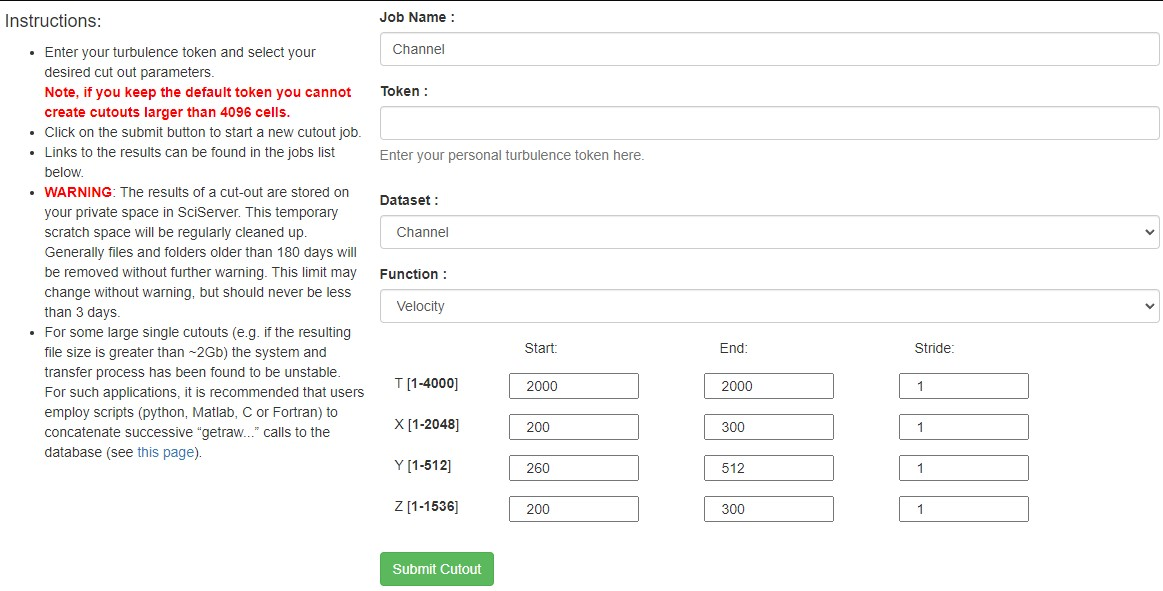

In [1]:
from IPython.display import Image
Image("Channel.jpg")

In [2]:
# import sys/os
import sys, os

# get current directory
path = os.getcwd()

# get parent directory
parent_directory = os.path.sep.join(path.split(os.path.sep)[:-2])

# add utils folder to current working path
sys.path.append(parent_directory+"/subfunctions/utils")

# add integration folder to current working path
sys.path.append(parent_directory+"/subfunctions/integration")

In [3]:
# import h5py
import h5py

# import numpy
import numpy as np

# Import velocity data from file in data-folder
f = h5py.File('channel.h5', 'r')

U, V, W = [], [], []

for key in f.keys():
    if key[:8] == "Velocity":
        U.append(f[key][:,:,:,0])
        V.append(f[key][:,:,:,1])
        W.append(f[key][:,:,:,2])

U = np.array(U).transpose(2,3,1,0) # array (NY, NX, NZ, NT)
V = np.array(V).transpose(2,3,1,0) # array (NY, NX, NZ, NT)
W = np.array(W).transpose(2,3,1,0) # array (NY, NX, NZ, NT)
x = f['xcoor'][:].reshape(1,-1) # array (1, NX)
y = f['ycoor'][:].reshape(1,-1) # array (1, NY)
z = f['zcoor'][:].reshape(1,-1) # array (1, NZ)
time_data = np.linspace(0, 25.9935, U.shape[-1], endpoint = True).reshape(1,-1) # array (1, NT)

In [4]:
# Number of cores for parallel computing
Ncores = 7 # int

t0 = 0 # float 0 <= t0 < 25.9935

# Periodic boundary conditions
periodic_x = True # bool
periodic_y = False # bool
periodic_z = True # bool
periodic = [periodic_x, periodic_y, periodic_z]

# Unsteady velocity field
bool_unsteady = False # bool

# Defined domain
defined_domain = np.isfinite(U).astype(int) # array (NY, NX, NZ)

## Compute meshgrid of dataset
X, Y, Z = np.meshgrid(x, y, z) # array (NY, NX), array (NY, NX, NZ)

## Resolution of meshgrid
dx_data = X[0,1,0]-X[0,0,0] # float
dy_data = Y[1,0,0]-Y[0,0,0] # float
dz_data = Y[0,0,1]-Z[0,0,0] # float

In [ ]:
# Import function to compute laplacian of velocity from structured velocity data.
from ipynb.fs.defs.laplacian_velocity import laplacian_velocity

Lap_u, Lap_v, Lap_w  = laplacian_velocity(t0, X, Y, Z, U, V, W, periodic, bool_unsteady, 0, time_data)

Compute 1st order spatial derivative...


In [ ]:
from scipy.io import savemat

mat_data = {"Lap_u": Lap_u, "Lap_v": Lap_v, "Lap_w": Lap_w, "xspan": X[0,:,0], "yspan": Y[:,0,0], "zspan": Z[0,0,:]}

savemat("Channel.mat", mat_data)

NOTE: The mat-file "MomentumBarrierField.mat", stored in the same directory is originally found on the github account [haller-group](https://github.com/haller-group/TRA_TSE). It focuses on a reduced region of the JHTDB and has been included in order to reproduce the results from [1].

# References

[1] Aksamit, N.O., Haller, G. (2021). Objective Momentum Barriers in Wall Turbulence. In Review